In [12]:
# Import libraries
import tensorflow as tf
from tensorflow.keras import layers, models , Input
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Set random seed for reproducibility
tf.random.set_seed(42)

In [3]:
# Load Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 4us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 39s 1us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 5s 1us/step


In [4]:
# Print the shapes of the datasets
print("Training data shape:", x_train.shape)
print("Test data shape:", x_test.shape)
print("Training labels shape:", y_train.shape)

Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)
Training labels shape: (60000,)


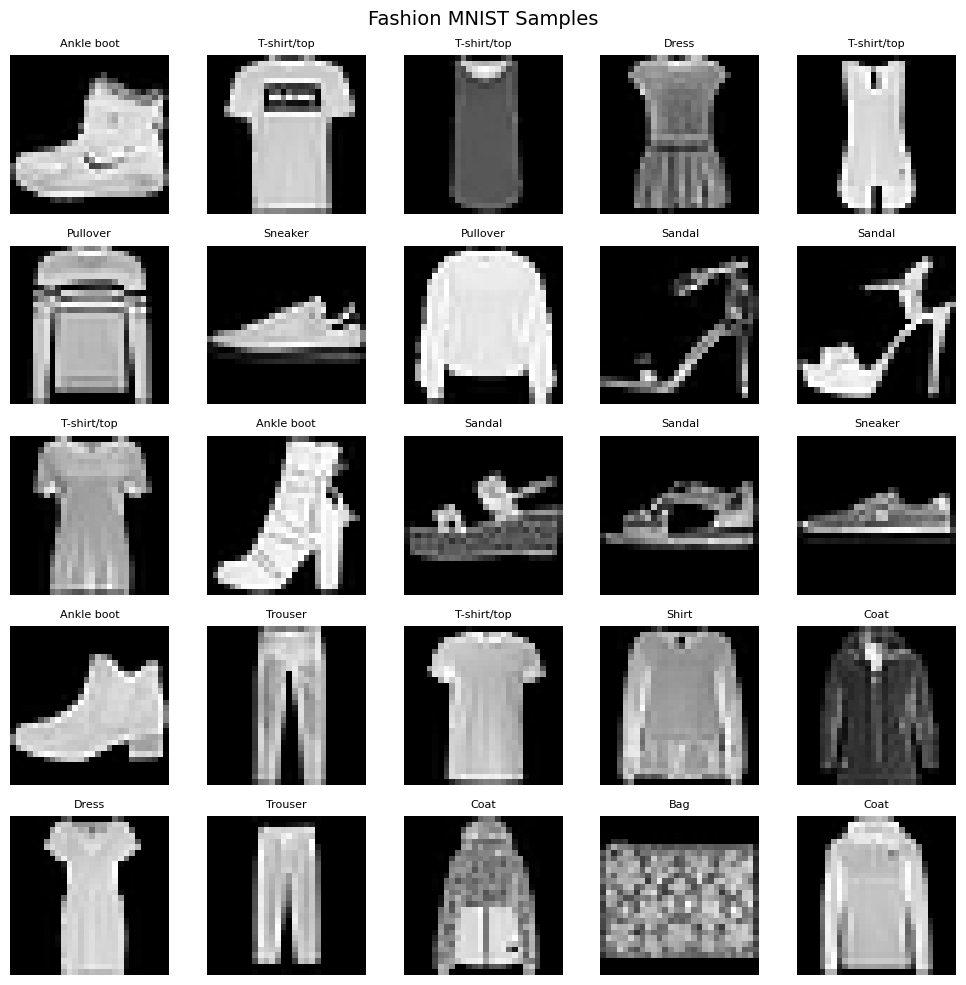

In [5]:
# Define class names for the labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Plot 25 images from the training set
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(class_names[y_train[i]], fontsize=8)
    plt.axis('off')
plt.suptitle("Fashion MNIST Samples", fontsize=14)
plt.tight_layout()
plt.show()

In [6]:
# Normalize pixel values to [0, 1]
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

In [7]:
# Reshape data to add channel dimension (28x28x1 for grayscale)
x_train = x_train[..., np.newaxis]
x_test = x_test[..., np.newaxis]

In [8]:
print("New shape of x_train:", x_train.shape)

New shape of x_train: (60000, 28, 28, 1)


In [13]:
# Build a Sequential CNN model
model = models.Sequential([
    # Input layer specifying the shape of input images (28x28 pixels, 1 channel for grayscale)
    Input(shape=(28, 28, 1)),
    
    # First convolutional layer with 32 filters of size 3x3 and ReLU activation
    layers.Conv2D(32, (3, 3), activation='relu'),
    
    # First max pooling layer to reduce spatial dimensions (downsampling)
    layers.MaxPooling2D((2, 2)),

    # Second convolutional layer with 64 filters of size 3x3 and ReLU activation
    layers.Conv2D(64, (3, 3), activation='relu'),

    # Second max pooling layer for further downsampling
    layers.MaxPooling2D((2, 2)),

    # Flatten the 2D feature maps into a 1D feature vector
    layers.Flatten(),

    # Fully connected dense layer with 128 neurons and ReLU activation
    layers.Dense(128, activation='relu'),

    # Dropout layer to reduce overfitting by randomly setting 30% of neurons to 0 during training
    layers.Dropout(0.3),

    # Output layer with 10 neurons (one for each class) and softmax activation to output probabilities
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(
    optimizer='adam',  # Adam optimizer adjusts learning rate during training
    loss='sparse_categorical_crossentropy',  # Use this when labels are integers (not one-hot)
    metrics=['accuracy']  
    
)

# Display the model's architecture summary
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# Train the model 
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=64,
                    validation_data=(x_test, y_test))


Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 18s 18ms/step - accuracy: 0.7202 - loss: 0.7819 - val_accuracy: 0.8633 - val_loss: 0.3760
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 18s 19ms/step - accuracy: 0.8639 - loss: 0.3762 - val_accuracy: 0.8846 - val_loss: 0.3223
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 18s 19ms/step - accuracy: 0.8823 - loss: 0.3227 - val_accuracy: 0.8921 - val_loss: 0.2998
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 18s 19ms/step - accuracy: 0.8931 - loss: 0.2907 - val_accuracy: 0.8981 - val_loss: 0.2857
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 19s 20ms/step - accuracy: 0.9007 - loss: 0.2651 - val_accuracy: 0.9032 - val_loss: 0.2686
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 18s 19ms/step - accuracy: 0.9087 - loss: 0.2445 - val_accuracy: 0.9008 - val_loss: 0.2742
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 18s 20ms/step - accuracy: 0.9141 - loss: 0.2284 - val_accuracy: 0.9077 - val_loss: 0.2569
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 19s 20ms/step - accuracy: 0.9203 - loss: 0.2116 - 

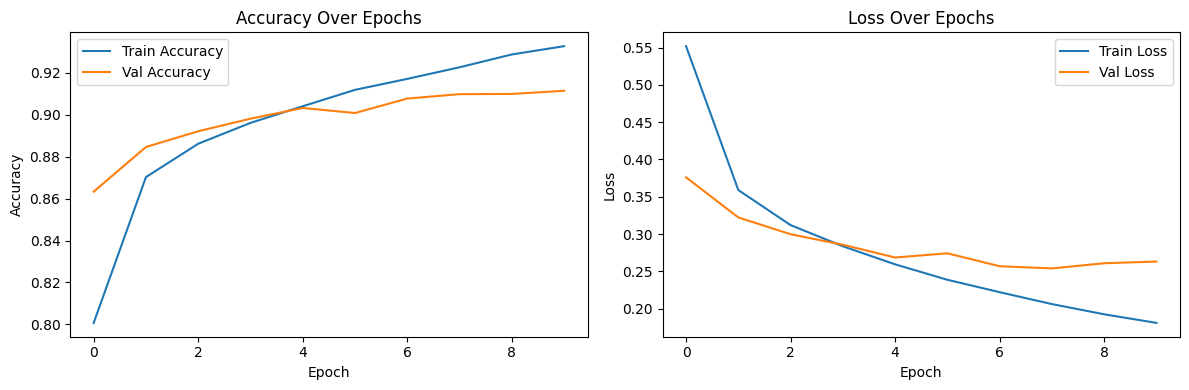

In [15]:
# Plot training vs validation accuracy & loss
plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [16]:
# Evaluate on test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9148 - loss: 0.2693
Test Accuracy: 0.9114


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


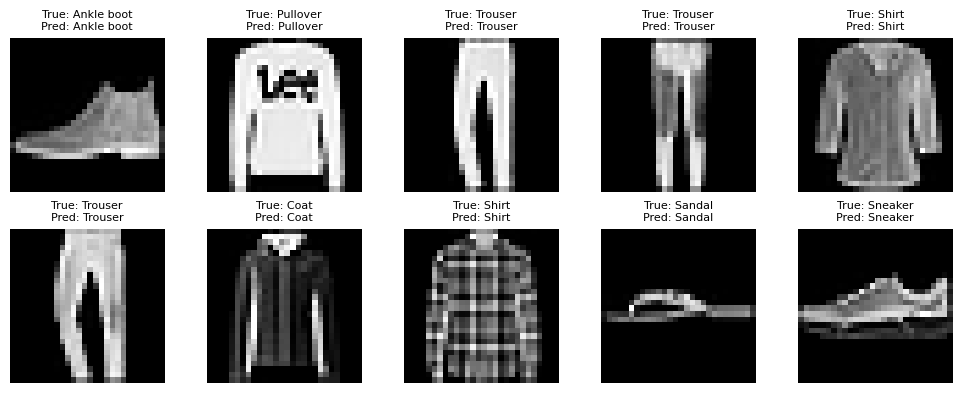

In [17]:
# Predict the first 10 test samples
predictions = model.predict(x_test[:10])
predicted_labels = np.argmax(predictions, axis=1)

# Display predictions
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_test[i].squeeze(), cmap='gray')
    plt.title(f"True: {class_names[y_test[i]]}\nPred: {class_names[predicted_labels[i]]}", fontsize=8)
    plt.axis('off')
plt.tight_layout()
plt.show()
